# ECE1508: Applied Deep Learning
# Assignment 1
## Malhotra, Vanshaj

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

Try an example

In [2]:
np.ones(3)

array([1., 1., 1.])

## Programming Question 1

In [18]:
class LinearMachine():
    def __init__(self):
        # Define weights as attribute
        # Set the initial values randomly

        # ============ COMPLETE HERE ================
        self._weights = np.random.randn(2,1)
        # ============================================
        pass

    def data_synthesizer(self, dataset_size, velocity_mean, velocity_var,
                         height_mean, height_var):

        # Draw random velocity and height
        # Let the array size to be <dataset_size>
        # Don't forget to make them positive using np.abs()
        
        # ============ COMPLETE HERE ================
        v_sample = np.abs(np.random.normal(velocity_mean,velocity_var,dataset_size))
        h_sample = np.abs(np.random.normal(height_mean,height_var,dataset_size))

        
        # Compute distance d via Newton's law
        d_sample = 0.45*v_sample*np.sqrt(h_sample)
        # ============================================

        # Make the dataset
        # ============ COMPLETE HERE ================
        x_mat = np.column_stack((v_sample,h_sample))
        d_mat = d_sample.reshape(-1,1)
        dataset = (x_mat,d_mat)
        return dataset
        # ============================================
        pass

    def train_GD(self, dataset, lr, delta = float("inf"), max_iterations = 1e12):

        # We can reset the weights to some initial random values
        # ============ COMPLETE HERE ================
        self._weights = np.random.randn(2,1)
        # ============================================

        # read data-points and labels
        # ============ COMPLETE HERE ================
        x_mat, d_mat = dataset
        # ============================================

        # Count number of iterations to stop after max iterations
        counter = 0

        # Initiate risk
        risk = 0

        while delta > 0 and counter < max_iterations:
            
            # Compute Gradient
            # ============ COMPLETE HERE ================
            I = x_mat.shape[0]
            grad = (2/I)* (np.transpose(x_mat) @ ((x_mat@self._weights) - d_mat))
            # ============================================

            # Save risk at current weights
            # ============ COMPLETE HERE ================
            old_risk = (1/I)*np.sum(((x_mat@self._weights)-d_mat)**2)
            # ============================================

            # Update weights using GD with learning rate lr
            # ============ COMPLETE HERE ================
            self._weights = self._weights - (lr * grad)
            # ============================================

            # Compute new risk
            # ============ COMPLETE HERE ================
            risk = (1/I)*np.sum(((x_mat@self._weights)-d_mat)**2)
            # ============================================

            # Update stopping criteria
            delta = np.abs(risk - old_risk)
            counter += 1

        # Print out if the code stops due to max iterations, i.e., GD did not converge
        if counter == max_iterations:
            print(f"GD dos not converge: train_GD hit max iterations = {max_iterations}!")

        return risk
    

    def train(self, dataset):
        x_mat, d_mat = dataset
        I, n = x_mat.shape  # samples, features

        # --- Find optimal weights (closed-form solution) ---
        # w* = (X^T X)^(-1) X^T d
        self._weights = np.linalg.inv(x_mat.T @ x_mat) @ x_mat.T @ d_mat

        # --- Compute minimum risk (MSE) ---
        y_hat = x_mat @ self._weights
        risk_opt = (1/I) * np.sum((y_hat - d_mat) ** 2)

        return risk_opt
    
    def test(self, J, velocity_mean, velocity_var, height_mean, height_var):
          
          # Generate an independent dataset for test
          # ============ COMPLETE HERE ================
          v_test = np.abs(np.random.normal(velocity_mean, velocity_var, J))
          h_test = np.abs(np.random.normal(height_mean,height_var, J))

          d_test = 0.45 * v_test * np.sqrt(h_test)
          
          x_test = np.column_stack((v_test,h_test))
          d_test_mat = d_test.reshape(-1,1)
          dataset = (x_test,d_test_mat) ## COMPLETE ##
          # ============================================

          # Compute the risk via the trained weights
          # ============ COMPLETE HERE ================
          I = x_test.shape[0]
          risk_test = (2/I)* (np.transpose(x_test) @ ((x_test@self._weights) - d_test_mat))
          # =====================
          # =======================

          # Compute test risk
          # ============ COMPLETE HERE ================
          #risk_test = 0  ## COMPLETE ##
          # ============================================
          return risk_test

### Gradient Descent vs Optimal Training

c:\Users\Vanshaj\anaconda3\envs\ece1508\lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Vanshaj\AppData\Local\Temp\ipykernel_38980\4192585617.py:74: RuntimeWarning: overflow encountered in square
  risk = (1/I)*np.sum(((x_mat@self._weights)-d_mat)**2)
C:\Users\Vanshaj\AppData\Local\Temp\ipykernel_38980\4192585617.py:78: RuntimeWarning: invalid value encountered in scalar subtract
  delta = np.abs(risk - old_risk)


GD dos not converge: train_GD hit max iterations = 5000!


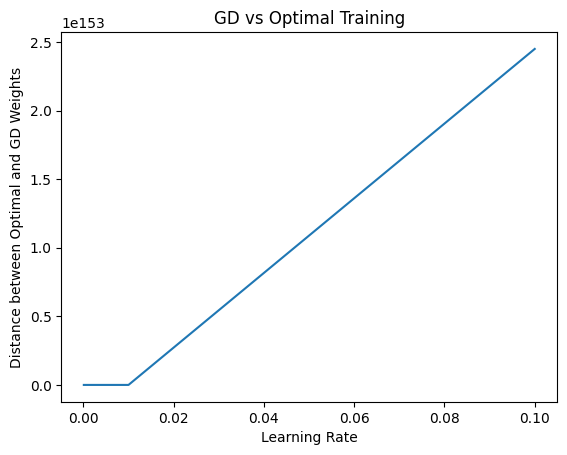

In [19]:
def Optimality_Gap(lr_list):
    myModel = LinearMachine()
    dataset = myModel.data_synthesizer(100, 1, 5, 3, 3)

    # Initiate optimality gap vector
    Opt_gap = []

    # Find optimal weights
    myModel.train(dataset)
    weights_optimal = myModel._weights

    # Find GD trained weights 
    for lr in lr_list:
        # ============ COMPLETE HERE ================
        model_gd = LinearMachine()
        model_gd.train_GD(dataset, lr=lr, max_iterations=5000)

        weights_GD = model_gd._weights.copy()
        # ============================================

        # Append the optimality gap 
        Opt_gap.append(np.linalg.norm(weights_optimal-weights_GD))


    # Plot 
    plt.figure()
    plt.plot(lr_list, Opt_gap)
    plt.title('GD vs Optimal Training')
    plt.xlabel('Learning Rate')
    plt.ylabel('Distance between Optimal and GD Weights')

    plt.show()


# Execute your implementation
Optimality_Gap([0.1, 0.01, 0.001, 0.0001])

### Test Loop

GD dos not converge: train_GD hit max iterations = 5000!
GD dos not converge: train_GD hit max iterations = 5000!
GD dos not converge: train_GD hit max iterations = 5000!


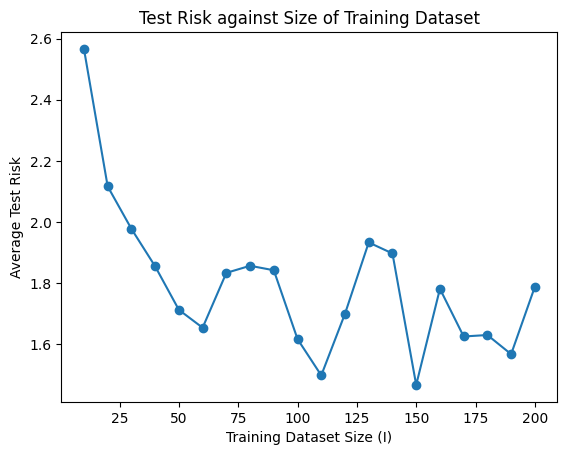

In [24]:
def eval_model(T, I, J, velocity_mean, velocity_var, height_mean, height_var):
    myModel = LinearMachine()
    lr = 0.001
    
    
    # Initiate the risk 

    emp_risk = 0

    # Loop over t

    for t in range(T):
        
        X_train, d_train = myModel.data_synthesizer(I, velocity_mean, velocity_var,
                                                    height_mean, height_var)
        dataset = (X_train, d_train)

        
        myModel.train_GD(dataset, lr=lr, max_iterations=5000)

        
        X_test, d_test = myModel.data_synthesizer(J, velocity_mean, velocity_var,
                                                  height_mean, height_var)

       
        y_hat = X_test @ myModel._weights
        risk = (1/J) * np.sum((y_hat - d_test) ** 2)

        emp_risk += risk
    
    # Average rist over datasets
    emp_risk = emp_risk / T

    return emp_risk


# Make list for plot
emp_risk_list = []
T, J = 100, 10  # J is test set size

# loop over I
I_list = [10 * i for i in range(1, 21)]
for I in I_list:
    emp_risk_list.append(eval_model(T, I, J, 1, 5, 3, 3))

# Plot
plt.figure()
plt.plot(I_list, emp_risk_list, marker='o')
plt.title('Test Risk against Size of Training Dataset')
plt.xlabel('Training Dataset Size (I)')
plt.ylabel('Average Test Risk')
plt.show()


## Programming Question 2

### Perceptron Machine

In [25]:
class PerceptronMachine():
    def __init__(self):
        # define weights as attribute and initiate randomly
        self._dimensions = 9
        # ============ COMPLETE HERE ================
        self._weights = np.random.randn(self._dimensions)
        self._bias = np.random.randn(1)
        # ============================================


    def forward(self, datapoint):
        # Affine function
        # ============ COMPLETE HERE ================
                
        affine = np.dot(self._weights, datapoint) + self._bias
        # ============================================

        # Activate by step function
        return 1 if affine > 0 else 0

    def train(self, dataset, lr):
        # initiate weights again randomly as we start with training
        # ============ COMPLETE HERE ================
        self._weights = np.random.randn(self._dimensions)
        self._bias = np.random.randn(1)
        # ============================================

        # initiate error_flag with 1 to get to the while loop
        error_flag = 1

        while error_flag > 0:
            # We initially have no error
            error_flag = 0
            for data in dataset:
                # Read data
                x = data[0]
                label = data[1]

                # Pass it forward
                y = self.forward(x)

                # Implement inner loop
                if y != label:
                    # Find sign(z) 
                    # ============ COMPLETE HERE ================
                    sign_z = (label - y)
                    # ============================================

                    # Set movement vector = sgn(z) * x
                    # ============ COMPLETE HERE ================
                    movement = sign_z * np.array(x)
                    # ============================================

                    # Update
                    # ============ COMPLETE HERE ================
                    self._weights += lr * movement
                    self._bias += lr * sign_z
                    # ============================================

                    # Since we had error, we set the flag 1 again
                    error_flag = 1


### X Pattern

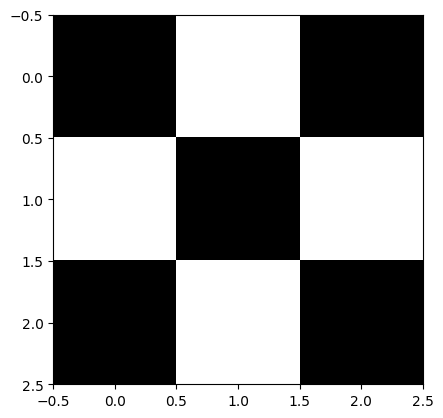

In [28]:
# Generating the X Pattern
# Run this code to see X pattern

x = 256* np.ones([3,3],dtype = int)

for i in range(3):
    x[i,i] = 0
    x[i,2-i] = 0

plt.imshow(x,cmap='gray')

x_pattern = [0, 1, 0,
             1, 0, 1,
             0, 1, 0]

### Generate Dataset and Train

In [29]:
# Generate the Dataset
# Initiate empty dataset
dataset = []
image_list = []

# We have 2^9=512 possibilities: loop over them
for i in range(512): 
    # generate 9-dimensional vector
    # ============ COMPLETE HERE ================
    bits = [(i >> k) & 1 for k in range (9)]
    vec = [b for b in bits]
    # ============================================

    # label the vector
    # ============ COMPLETE HERE ================
    if vec == x_pattern:
        label = 1
    else :
        label = 0
    
    dataset.append([vec, label])

    # ============================================


# Instantiate a perceptron and train it 
myModel = PerceptronMachine()
myModel.train(dataset, 0.001)

### Test Trained Model

In [30]:
# Initiate the test set
testset = []

# Add the X pattern
testset.append([0, 1, 0, 1, 0, 1, 0, 1, 0])

# Choose some data samples
for i in range(10):
    rand_idx = int(np.random.rand() * 512) % 512
    while rand_idx == 170:
        rand_idx = int(np.random.rand() * 512) % 512
    testset.append(dataset[rand_idx][0])


# Test the set: only the first one should return 1
for test in testset:
    print(f"Is it X patter? Answer: {myModel.forward(test)}")


Is it X patter? Answer: 1
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0
